In [1]:
from controller.database_controller import DatabaseController
import numpy as np
DB_PATH = r"..\data\gui_database.db"

In [2]:
db = DatabaseController(DB_PATH)

In [3]:
db.get_user_id_list()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 52,
 53,
 54,
 55,
 57]

In [4]:
res = db.get_user(1)
print(f"type: {type(res)}")
print(f"shape: {res.shape}")
print("--- Inside numpy.ndarray ---")
print(f"type: {type(res[0])}")
print(f"len: {len(res[0])}")
print(f"res: {(res[0])[:100]}")

type: <class 'numpy.ndarray'>
shape: (11,)
--- Inside numpy.ndarray ---
type: <class 'numpy.str_'>
len: 7468
res: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAx


In [5]:
res = db.get_table()
print(f"type: {type(res)}")
print(f"len: {len(res)}")
print("--- Inside list ---")
print(f"type: {type(res[0])}")
print(f"len: {len(res[0])}")
print(f"res: {(res[0][0], res[0][1][:100])}")

type: <class 'list'>
len: 47
--- Inside list ---
type: <class 'tuple'>
len: 2
res: (1, '["/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLD')


In [6]:
res = db.get_user_vectors()
print(f"type: {type(res)}")
print(f"len: {len(res)}")
print(f"res: {res[0][:100]}")

type: <class 'list'>
len: 47
res: ["/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLD


In [7]:
# Add user
data1 = np.random.rand(4, 3)
print("Original array 1:\n", data1)
user_id = db.add_user(data1)
print("User id is:", user_id)

# Modifie user
data2 = np.random.rand(4, 3)
print("Original array 2:\n", data2)
res = db.update_user(user_id, data2)
print("Number of affected rows:", res)
retrieved_array = db.get_user(user_id)
print("Both arrays not match:", data1==retrieved_array)

# Delete user
res = db.delete_user(user_id)
print("Delete user:", user_id)
print("Number of affected rows:", res)

Original array 1:
 [[0.66394576 0.08209834 0.00099981]
 [0.59625086 0.99888342 0.89376822]
 [0.61086212 0.26943002 0.1166045 ]
 [0.18355272 0.34802413 0.74617052]]
User id is: 56
Original array 2:
 [[0.10816908 0.27353908 0.952868  ]
 [0.61652974 0.19611172 0.17095677]
 [0.67113713 0.78171386 0.18226443]
 [0.29071715 0.51128359 0.12347174]]
Number of affected rows: 1
Both arrays not match: [[False False False]
 [False False False]
 [False False False]
 [False False False]]
Delete user: 56
Number of affected rows: 1


In [9]:
from controller.user_creation_controller import UserCreationController

user_id = 3
user_data = UserCreationController.get_user_data(int(user_id))
user_data

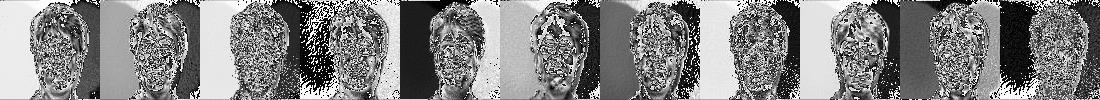

In [16]:
from controller.database_controller import DatabaseController
from PIL import Image
import base64, io

user_id = 57
res = db.get_user(user_id)

def display_images_side_by_side(images, background_color=(255, 255, 255)):
    images = [img.convert('RGB') for img in images]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height), background_color)
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.width
    display(new_im)



def base64_to_pil(b64_string):
    image_data = base64.b64decode(b64_string)
    image = Image.open(io.BytesIO(image_data))
    return image


display_images_side_by_side([base64_to_pil(i) for i in res])